# **Orbit Classification of Satellites using ML and Orbital Mechanics**

**Abstract**

---


*The project aims to develop a machine learning model capable of classifying satellites into orbital categories such as Low Earth Orbit (LEO), Medium Earth Orbit (MEO), and Geostationary Orbit (GEO) based on orbital parameters. Utilizing publicly available datasets containing satellite parameters such as inclination, eccentricity, semi-major axis and orbital period, the project applies supervised learning techniques to predict the orbit class. The model will be evaluated for accuracy using real-world satellite data. This work aims to bridge the fields of orbital dynamics and AI to enhance orbital prediction and satellite classification.*

In [ ]:
'''
Author: Premanshu Bhagat
Date: 21/7/2025
'''
# required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report ,confusion_matrix, accuracy_score

In [16]:
# data cleanup/preprocessing

df = pd.read_excel('UCS-Satellite-Database.xlsx')
relevent_columns = ['Class of Orbit','Perigee (km)','Apogee (km)',
                     'Eccentricity','Inclination (degrees)',
                     'Period (minutes)']


df = df[relevent_columns] # selecting relevant colunmns for prediction purposes
df.dropna(inplace=True)   # dropping rows with missing values


# feature engineering:
# computing semi-major axis and storing in a separate column
# semi-major axis is a stronger and condensed feature for prediction
df['Semi-Major Axis(km)'] = (df['Perigee (km)'] + df['Apogee (km)']) / 2
df.drop(['Perigee (km)','Apogee (km)'], axis=1,inplace=True)
df.head()

,Class of Orbit,Eccentricity,Inclination (degrees),Period (minutes),Semi-Major Axis(km)
0,LEO,0.001510,36.90,96.08,571.0
1,LEO,0.001510,98.00,95.00,645.5
2,LEO,0.001450,97.45,94.70,507.0
3,LEO,0.001510,98.20,95.90,564.5
4,GEO,0.000178,0.08,1436.03,35785.5


   Eccentricity  Inclination (degrees)  Period (minutes)  Semi-Major Axis(km)  \
0      0.001510                  36.90             96.08                571.0   
1      0.001510                  98.00             95.00                645.5   
2      0.001450                  97.45             94.70                507.0   
3      0.001510                  98.20             95.90                564.5   
4      0.000178                   0.08           1436.03              35785.5   

  Label - Orbit Class  
0                 LEO  
1                 LEO  
2                 LEO  
3                 LEO  
4                 GEO   



/tmp/ipython-input-17-1168747304.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='Label - Orbit Class', palette='rocket',


<Axes: xlabel='Label - Orbit Class', ylabel='count'>

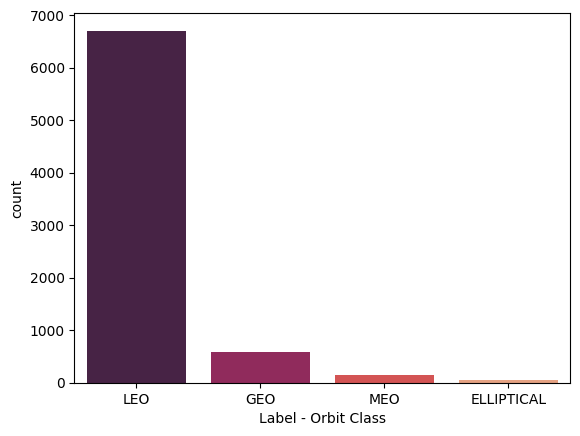

In [17]:
# Orbital class cleanup and labeling

def orbital_class_cleanup(orbit):
  '''standardize orbit class labels'''
  orbit = str(orbit).upper()
  if 'LEO' in orbit:
    return 'LEO'
  elif 'GEO' in orbit:
    return 'GEO'
  elif 'MEO' in orbit:
    return 'MEO'
  elif 'ELLIPTICAL' in orbit:
    return 'ELLIPTICAL'
  else:
    return 'Other'

try:
  df['Label - Orbit Class'] = df['Class of Orbit'].apply(orbital_class_cleanup)
  df.drop('Class of Orbit',axis=1,inplace=True)
except KeyError:
  print('Orbit class preprocessed.')

print(df.head(), '\n')

# visualizing the orbital class distribution
sns.countplot(df, x='Label - Orbit Class', palette='rocket',
              order=df['Label - Orbit Class'].value_counts().index)

In [18]:
# encoding the cleaned orbit classes into numerical labels

le = LabelEncoder()
df['Encoded - Orbit Class'] = le.fit_transform(df['Label - Orbit Class'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f'Orbit Class Mapping: {label_mapping}')

Orbit Class Mapping: {'ELLIPTICAL': np.int64(0), 'GEO': np.int64(1), 'LEO': np.int64(2), 'MEO': np.int64(3)}


In [19]:
# feature and target split
feature_vector = ['Inclination (degrees)','Eccentricity',
                  'Semi-Major Axis(km)','Period (minutes)']

X = df[feature_vector]          # feature
y = df['Encoded - Orbit Class'] # target

# feature scaling - standardization - mean = 0, std. dev = 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split - 80% train and 20% test
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,
                                                random_state=42, stratify=y)


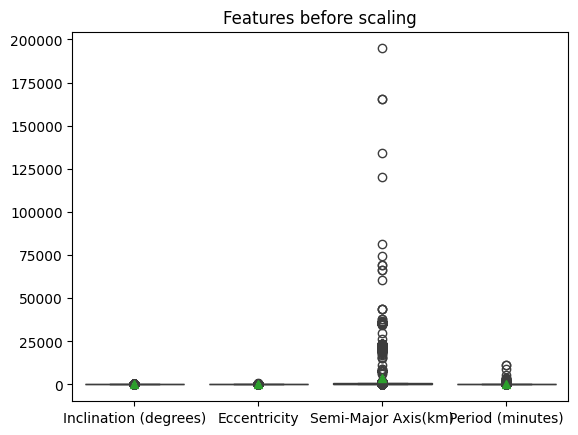


Before Scaling

Mean: 
 Inclination (degrees)      62.605166
Eccentricity                0.482844
Semi-Major Axis(km)      3969.915010
Period (minutes)          224.170578
dtype: float64 

Standard Deviation: 
 Inclination (degrees)       27.187115
Eccentricity                15.622805
Semi-Major Axis(km)      10781.097502
Period (minutes)           441.737993
dtype: float64 



In [20]:
# distribution of features before scaling
sns.boxplot(data=X, orient='v', showmeans=True)
plt.title('Features before scaling')
plt.show()
print('\nBefore Scaling\n')
print('Mean: \n',X.mean(axis=0),'\n')
print('Standard Deviation: \n',X.std(axis=0),'\n')

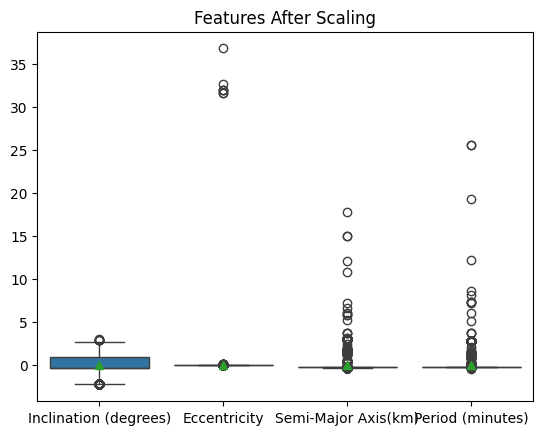


After Feature Scaling

Mean: 
 [-1.51683573e-16 -2.84406699e-18 -3.03367145e-17 -3.03367145e-17] 

Standard Deviation: 
 [1. 1. 1. 1.] 



In [21]:
# distribution of features after scaling

sns.boxplot(data=X_scaled, orient='v', showmeans=True)
plt.xticks(ticks=range(len(feature_vector)), labels=feature_vector)
plt.title('Features After Scaling')
plt.show()
print('\nAfter Feature Scaling\n')
print('Mean: \n',X_scaled.mean(axis=0),'\n')
print('Standard Deviation: \n',X_scaled.std(axis=0),'\n')

/tmp/ipython-input-22-2624434042.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_vector, palette='rocket')


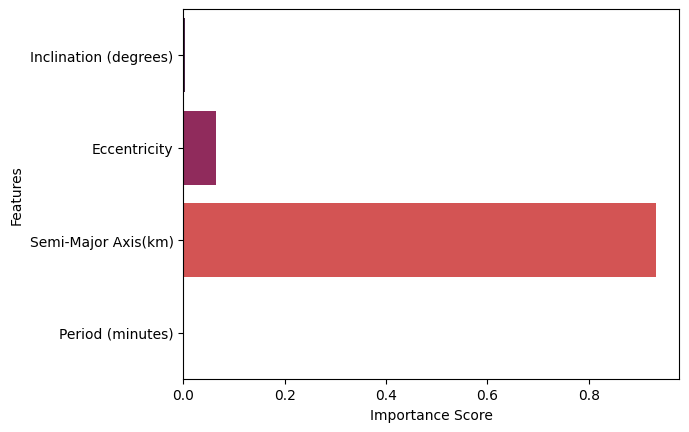

In [22]:
# training a decision tree classifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


# feature importance metrics
importances = model.feature_importances_
sns.barplot(x=importances, y=feature_vector, palette='rocket')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

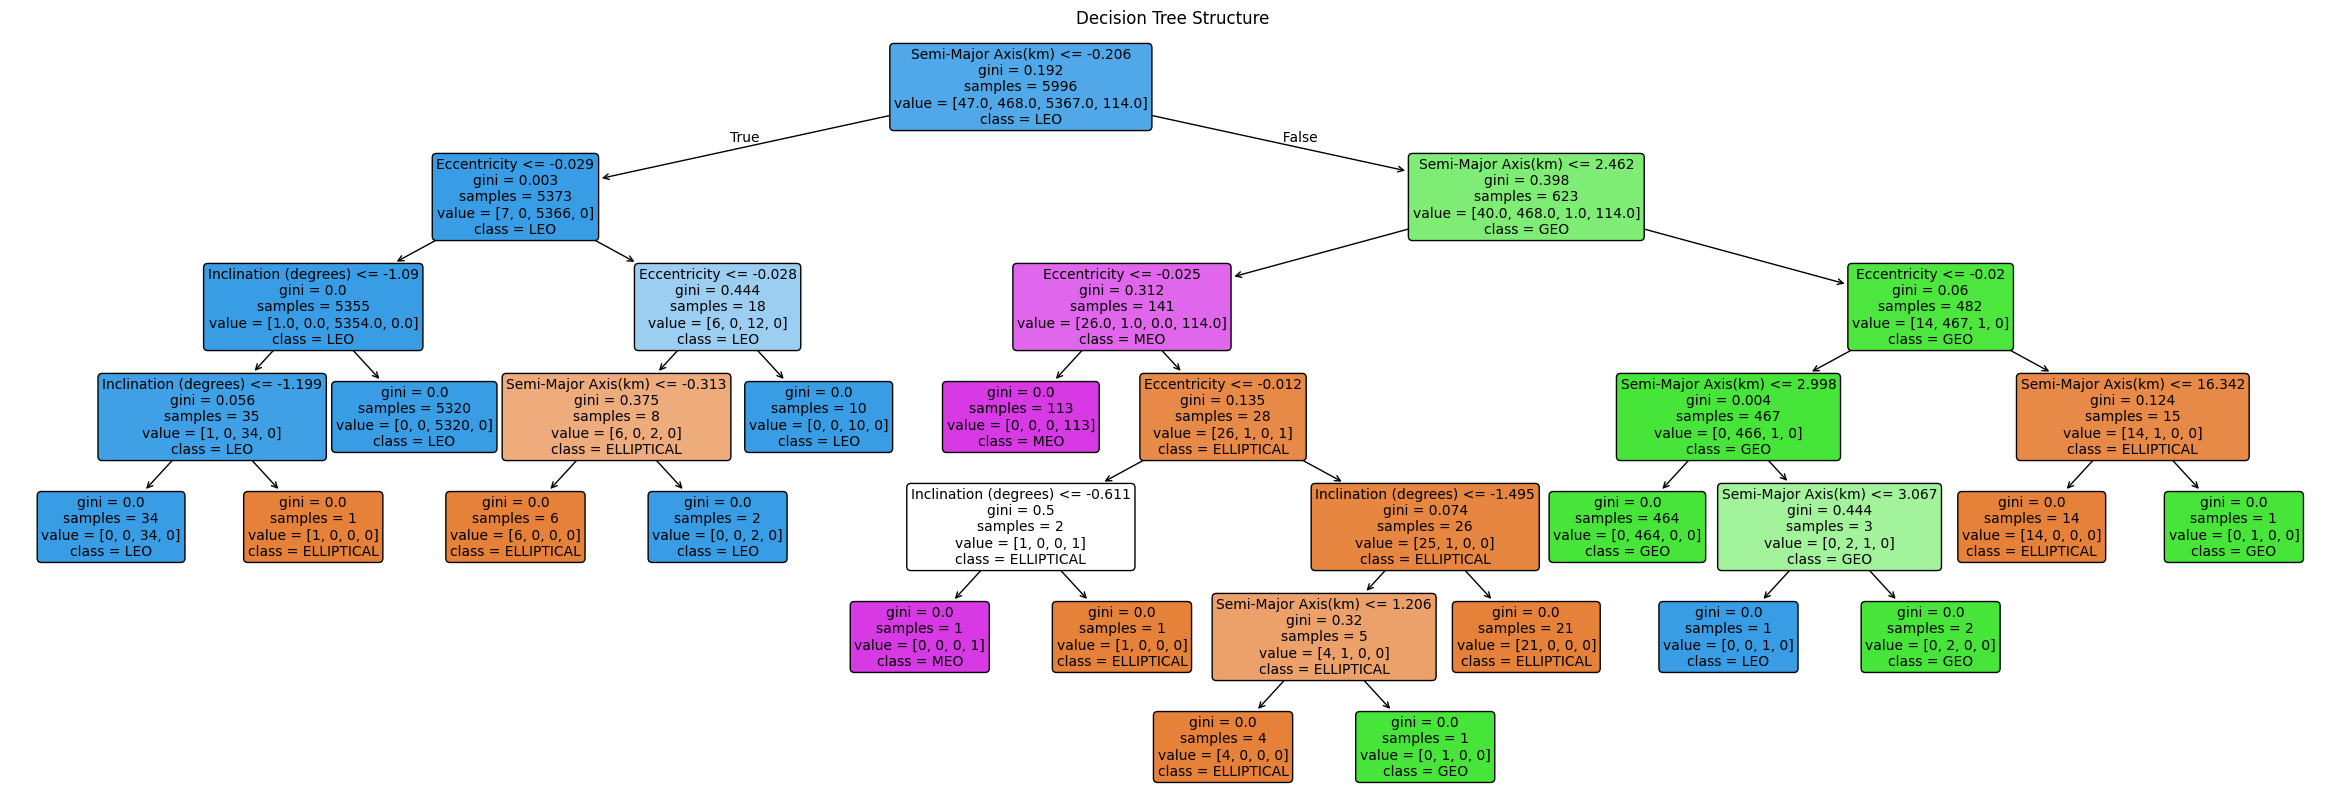

In [23]:
# flow of the decision tree
plt.figure(figsize=(30,10))
plot_tree(model,
          feature_names=feature_vector,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Structure')
plt.show()


              precision    recall  f1-score   support

  ELLIPTICAL       1.00      1.00      1.00        12
         GEO       1.00      0.99      1.00       117
         LEO       1.00      1.00      1.00      1341
         MEO       1.00      1.00      1.00        29

    accuracy                           1.00      1499
   macro avg       1.00      1.00      1.00      1499
weighted avg       1.00      1.00      1.00      1499

Confusion Matrix:
 [[  12    0    0    0]
 [   0  116    1    0]
 [   0    0 1341    0]
 [   0    0    0   29]] 

##### Overall Model Accuracy: 99.93328885923948%




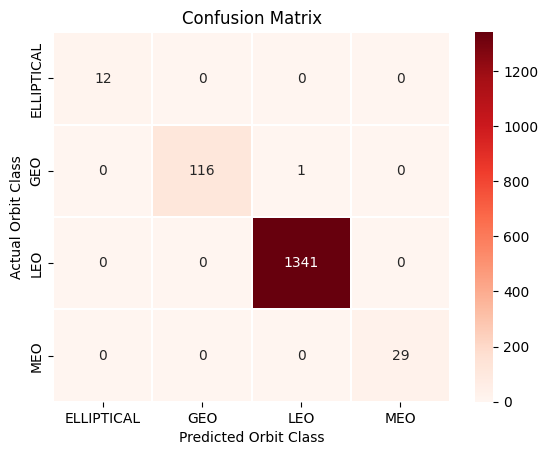

In [24]:
# predicting using the model
y_pred = model.predict(X_test)

#classification metrics
print(classification_report(y_test,y_pred,target_names=le.classes_))
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',conf_matrix, '\n')

# prediction accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f'##### Overall Model Accuracy: {accuracy*100}%\n\n')

sns.heatmap(conf_matrix,annot=True,fmt='d',linewidths=0.3,linecolor='white',
            cmap='Reds',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Orbit Class')
plt.ylabel('Actual Orbit Class')
plt.show()
# Orbit Class Mapping: {
#   'ELLIPTICAL': np.int64(0),class 0
#   'GEO': np.int64(1), class 1
#   'LEO': np.int64(2), class 2
#   'MEO': np.int64(3)} class 3

As visible from the classification report:
- Elliptical ---> 100% precision, 100% recall
- GEO ---> 100% Precision, 99% Recall (1 wrong classification on training data)
- LEO ---> 100% precision, 100% recall
- MEO ---> 100% precision, 100% recall

In [32]:
# CLI tool for user input based predictions
keep_predicting = True

while keep_predicting:
  print('-----------------------------------------')
  print('Input: Satellite Orbital Parameters')
  print('-----------------------------------------')

  inclination = np.float64(input('Enter Inclination(degrees): '))
  eccentricity = np.float64(input('Enter Eccentricity: '))
  apogee = np.float64(input('Enter Apogee(km):'))
  perigee = np.float64(input('Enter Perigee(km):'))
  semi_major_axis = (apogee + perigee)/2
  print(f'Semi-Major Axis = {semi_major_axis}')
  period = np.float64(input('Enter period(minutes): '))

# preparing user inptut
  inp_arr = pd.DataFrame([[inclination,eccentricity,semi_major_axis,period]],
                         columns=feature_vector)
  input_scaled = scaler.transform(inp_arr)
  output = (model.predict(input_scaled))

  print('-----------------------------------------')
  if output == [0]:
    print('Satellite Orbital Class: Elliptical')
  elif output == [1]:
    print('Satellite Orbital Class: GEO')
  elif output == [2]:
    print('Satellite Orbital Class: LEO')
  elif output == [3]:
    print('Satellite Orbital Class: MEO')
  print('-----------------------------------------')

  continue_predicting = input('Would you like to predict for Another Satellite [y/n]: ')
  if continue_predicting.lower() == 'y':
    keep_predicting = True
  elif continue_predicting.lower() == 'n':
    keep_predicting = False
    break

# Orbit Class Mapping: {
#   'ELLIPTICAL': np.int64(0),class 0
#   'GEO': np.int64(1), class 1
#   'LEO': np.int64(2), class 2
#   'MEO': np.int64(3)} class 3


-----------------------------------------
Input: Satellite Orbital Parameters
-----------------------------------------
Enter Inclination(degrees): 50
Enter Eccentricity: 0.001
Enter Apogee(km):500
Enter Perigee(km):450
Semi-Major Axis = 475.0
Enter period(minutes): 95
-----------------------------------------
Satellite Orbital Class: LEO
-----------------------------------------
Would you like to predict for Another Satellite [y/n]: y
-----------------------------------------
Input: Satellite Orbital Parameters
-----------------------------------------
Enter Inclination(degrees): 55
Enter Eccentricity: 0.01
Enter Apogee(km):20000
Enter Perigee(km):19000
Semi-Major Axis = 19500.0
Enter period(minutes): 720
-----------------------------------------
Satellite Orbital Class: MEO
-----------------------------------------
Would you like to predict for Another Satellite [y/n]: y
-----------------------------------------
Input: Satellite Orbital Parameters
------------------------------------





---







### NOT PART OF PROJECT SCOPE: Testing an SVM to compare with the Decision Tree Classifier

In [26]:
from sklearn import svm

m2 = svm.SVC()
m2.fit(X_train, y_train)

SVC()

In [30]:
# CLI tool for user input based predictions ---> SVM
keep_predicting = True

while keep_predicting:
  print('-----------------------------------------')
  print('Input: Satellite Orbital Parameters')
  print('-----------------------------------------')

  inclination = np.float64(input('Enter Inclination(degrees): '))
  eccentricity = np.float64(input('Enter Eccentricity: '))
  apogee = np.float64(input('Enter Apogee(km):'))
  perigee = np.float64(input('Enter Perigee(km):'))
  semi_major_axis = (apogee + perigee)/2
  print(f'Semi-Major Axis = {semi_major_axis}')
  period = np.float64(input('Enter period(minutes): '))

# preparing user inptut
  inp_arr = pd.DataFrame([[inclination,eccentricity,semi_major_axis,period]],
                         columns=feature_vector)
  input_scaled = scaler.transform(inp_arr)
  output = (m2.predict(input_scaled))

  print('-----------------------------------------')
  if output == [0]:
    print('Satellite Orbital Class: Elliptical')
  elif output == [1]:
    print('Satellite Orbital Class: GEO')
  elif output == [2]:
    print('Satellite Orbital Class: LEO')
  elif output == [3]:
    print('Satellite Orbital Class: MEO')
  print('-----------------------------------------')

  continue_predicting = input('Would you like to predict for Another Satellite [y/n]: ')
  if continue_predicting.lower() == 'y':
    keep_predicting = True
  elif continue_predicting.lower() == 'n':
    keep_predicting = False
    break

-----------------------------------------
Input: Satellite Orbital Parameters
-----------------------------------------
Enter Inclination(degrees): 30
Enter Eccentricity: 0.001
Enter Apogee(km):250
Enter Perigee(km):240
Semi-Major Axis = 245.0
Enter period(minutes): 24
-----------------------------------------
Satellite Orbital Class: LEO
-----------------------------------------
Would you like to predict for Another Satellite [y/n]: n


In [28]:
# predicting using the model
y_pred = m2.predict(X_test)

#classification metrics
print(classification_report(y_test,y_pred,target_names=le.classes_))
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',conf_matrix, '\n')

# prediction accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f'##### Overall Model Accuracy: {accuracy*100}%\n\n')

              precision    recall  f1-score   support

  ELLIPTICAL       0.83      0.42      0.56        12
         GEO       0.99      1.00      1.00       117
         LEO       1.00      1.00      1.00      1341
         MEO       0.88      1.00      0.94        29

    accuracy                           0.99      1499
   macro avg       0.93      0.85      0.87      1499
weighted avg       0.99      0.99      0.99      1499

Confusion Matrix:
 [[   5    1    2    4]
 [   0  117    0    0]
 [   1    0 1340    0]
 [   0    0    0   29]] 

##### Overall Model Accuracy: 99.46631087391594%


